In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = '/home/christoph/Documents/projects/scientific_computing/entsoe-data'

This will import the data, you have to run it to be able to solve the homework.

In [2]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [3]:
countries_select = ["Austria", "Germany", "United Kingdom", "Spain", "Sweden", "Italy", "Croatia"]
power_demand_countries_select = power_demand[power_demand.AreaName.isin(countries_select)]
power_demand_countries_select = power_demand_countries_select["2015-01-01":"2019-12-31"]

In [4]:
power_demand_weekday_mean = power_demand_countries_select.groupby([power_demand_countries_select.index.weekday, "AreaName"]).mean()

In [5]:
power_demand_wed_sun = power_demand_weekday_mean.loc[[2, 6]].reset_index()[["AreaName", "DateTime", "TotalLoadValue"]]
power_demand_wed_sun

,AreaName,DateTime,TotalLoadValue
0,Austria,2,7597.097115
1,Croatia,2,2072.242308
2,Germany,2,59894.796293
3,Italy,2,35925.647596
4,Spain,2,30108.756696
5,Sweden,2,16188.529006
6,United Kingdom,2,37681.473124
7,Austria,6,5982.295785
8,Croatia,6,1802.134738
9,Germany,6,46127.261956


In [6]:
power_demand_wed_sun = power_demand_wed_sun.pivot(index = "AreaName", columns = "DateTime", values = ["TotalLoadValue"])
power_demand_wed_sun["wed_sun_quotient"] = power_demand_wed_sun.iloc[:,0] / power_demand_wed_sun.iloc[:,1]
power_demand_wed_sun

TotalLoadValue               wed_sun_quotient
DateTime                    2             6                 
AreaName                                                    
Austria           7597.097115   5982.295785         1.269930
Croatia           2072.242308   1802.134738         1.149882
Germany          59894.796293  46127.261956         1.298468
Italy            35925.647596  26104.259419         1.376237
Spain            30108.756696  24857.647031         1.211247
Sweden           16188.529006  14489.429647         1.117265
United Kingdom   37681.473124  33251.563333         1.133224

Text(0, 0.5, 'Electricity load (MW)')

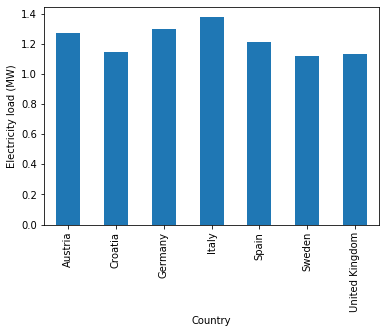

In [7]:
power_demand_wed_sun.iloc[:,2].plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Electricity load (MW)")

In [8]:
power_demand_wed_sun.iloc[:,2].idxmax()

'Italy'

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


In [9]:
power_demand

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2014-12-31 23:00:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7412.14,2017-09-14 04:16:36
2014-12-31 23:15:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7305.11,2017-09-14 04:16:36
2014-12-31 23:30:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7263.03,2017-09-14 04:16:36
2014-12-31 23:45:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7103.58,2017-09-14 04:16:36
2015-01-01 00:00:00,2015,1,1,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,6958.62,2017-09-14 04:00:17
...,...,...,...,...,...,...,...,...,...,...
2020-05-12 14:00:00,2020,5,12,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,7460.58,2020-05-12 21:21:14
2020-05-12 15:00:00,2020,5,12,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,7457.44,2020-05-12 22:49:48
2020-05-12 16:00:00,2020,5,12,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6417.68,2020-05-13 00:21:11


Text(0.5, 0, 'Month')

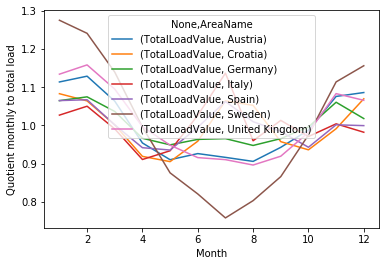

In [10]:
mean_month_total_load = power_demand_countries_select.groupby([power_demand_countries_select.index.month, "AreaName"]).mean()[["TotalLoadValue"]]
mean_country_total_load = power_demand_countries_select.groupby(["AreaName"]).mean()[["TotalLoadValue"]]
month_total_load_quotient = mean_month_total_load / mean_country_total_load
month_total_load_quotient = month_total_load_quotient.unstack()
month_total_load_quotient.plot()
plt.ylabel("Quotient monthly to total load")
plt.xlabel("Month")

In Sweden probably main energy consumer is heating (and maybe also lighting), thus increased energy consumption during the wither months and low energy consumption during the summer. In contrast, summer tourist season in Croatia increases energy demand during the summer months.

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

Text(0.5, 0, 'Hour of day')

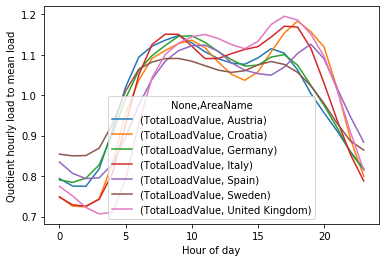

In [11]:
mean_hourly_total_load = power_demand_countries_select.groupby([power_demand_countries_select.index.hour, "AreaName"]).mean()[["TotalLoadValue"]]
hourly_total_load_quotient = mean_hourly_total_load / mean_country_total_load
hourly_total_load_quotient = hourly_total_load_quotient.unstack()
hourly_total_load_quotient.plot()
plt.ylabel("Quotient hourly load to mean load")
plt.xlabel("Hour of day")

In [12]:
print(hourly_total_load_quotient.std().idxmin()[1], "shows the lowest variability and", 
      hourly_total_load_quotient.std().idxmax()[1], "shows the larges variability.")

Sweden shows the lowest variability and United Kingdom shows the larges variability.


# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [13]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population

,Country,Population
Country,,
Austria,Austria,8840521
Croatia,Croatia,4087843
Germany,Germany,82905782
Italy,Italy,60421760
Spain,Spain,46796540
Sweden,Sweden,10175214
United Kingdom,United Kingdom,66460344


In [14]:
mean_country_total_load["load_per_capita"] = mean_country_total_load["TotalLoadValue"]/population ["Population"]
mean_country_total_load

,TotalLoadValue,load_per_capita
AreaName,,
Austria,7124.438760,0.000806
Croatia,2003.858225,0.000490
Germany,55859.257807,0.000674
Italy,33192.450073,0.000549
Spain,28664.970677,0.000613
Sweden,15623.217001,0.001535
United Kingdom,36318.162173,0.000546


Text(0.5, 0, 'Country')

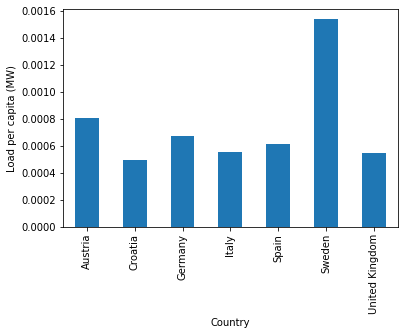

In [15]:
mean_country_total_load["load_per_capita"].plot(kind = "bar")
plt.ylabel("Mean load per capita (MW)")
plt.xlabel("Country")

In [16]:
print(mean_country_total_load["load_per_capita"].idxmin(), "shows the lowest per capita load and", 
      mean_country_total_load["load_per_capita"].idxmax(), "shows the largest per capita load.")

Croatia shows the lowest per capita load and Sweden shows the largest per capita load.


A conversion to MWh can by done by multiplying the mean annual load with the number of hours of a year.